In [126]:
import sqlite3
import pandas as pd
import pm4py
from pm4py.objects.log.importer.xes import importer as xes_importer
from pm4py.algo.discovery.alpha import algorithm as alpha_miner
from pathlib import Path
import warnings

warnings.filterwarnings("ignore", category=UserWarning)

In [127]:
dbPath = Path("../data/data.sqlite")
if not dbPath.exists():
    # Avoid creating an empty database
    raise Exception("Database file does not exist")
con = sqlite3.connect(dbPath)

In [128]:
def query2BPMN(sql):
    df = pd.read_sql_query(sql, con)
    df["EVENTTIME"] = pd.to_datetime(df["EVENTTIME"], infer_datetime_format=True)
    log = pm4py.format_dataframe(df, case_id="_CASE_KEY", activity_key="ACTIVITY_EN", timestamp_key="EVENTTIME")
    net, initial_marking, final_marking = alpha_miner.apply(log)
    process_model = pm4py.discover_bpmn_inductive(log)
    pm4py.view_bpmn(process_model)
    avgProfit = df["Profit"].mean()
    avgCosts = df["Costs"].mean()
    avgRevenue = df["Revenue"].mean()
    avgRating = df["CustomerSatisfaction"].mean()
    medianDirations = pd.Series(pm4py.stats.get_all_case_durations(log)).median() / 60 # seconds to minutes
    print()
    print(f"{avgProfit = } € \n{avgCosts = } € \n{avgRevenue = } € \n{avgRating = } ⭐️\n {medianDirations = } minutes")
    print()
    # case durations
    
    print()


In [129]:
#query2BPMN("SELECT * FROM Pizza_Event")

## Analyse By Variant

['select e.sorting, e.EVENTTIME, e.ACTIVITY_EN, e.Automation,  c.*, Revenue - Costs as "Profit"\n                from Pizza_Event e\n                inner join Pizza_Case c on e._CASE_KEY = c._CASE_KEY\n                WHERE Variant = 1\n                order by sorting\n        ', 'select e.sorting, e.EVENTTIME, e.ACTIVITY_EN, e.Automation,  c.*, Revenue - Costs as "Profit"\n                from Pizza_Event e\n                inner join Pizza_Case c on e._CASE_KEY = c._CASE_KEY\n                WHERE Variant = 2\n                order by sorting\n        ', 'select e.sorting, e.EVENTTIME, e.ACTIVITY_EN, e.Automation,  c.*, Revenue - Costs as "Profit"\n                from Pizza_Event e\n                inner join Pizza_Case c on e._CASE_KEY = c._CASE_KEY\n                WHERE Variant = 3\n                order by sorting\n        ', 'select e.sorting, e.EVENTTIME, e.ACTIVITY_EN, e.Automation,  c.*, Revenue - Costs as "Profit"\n                from Pizza_Event e\n                inner

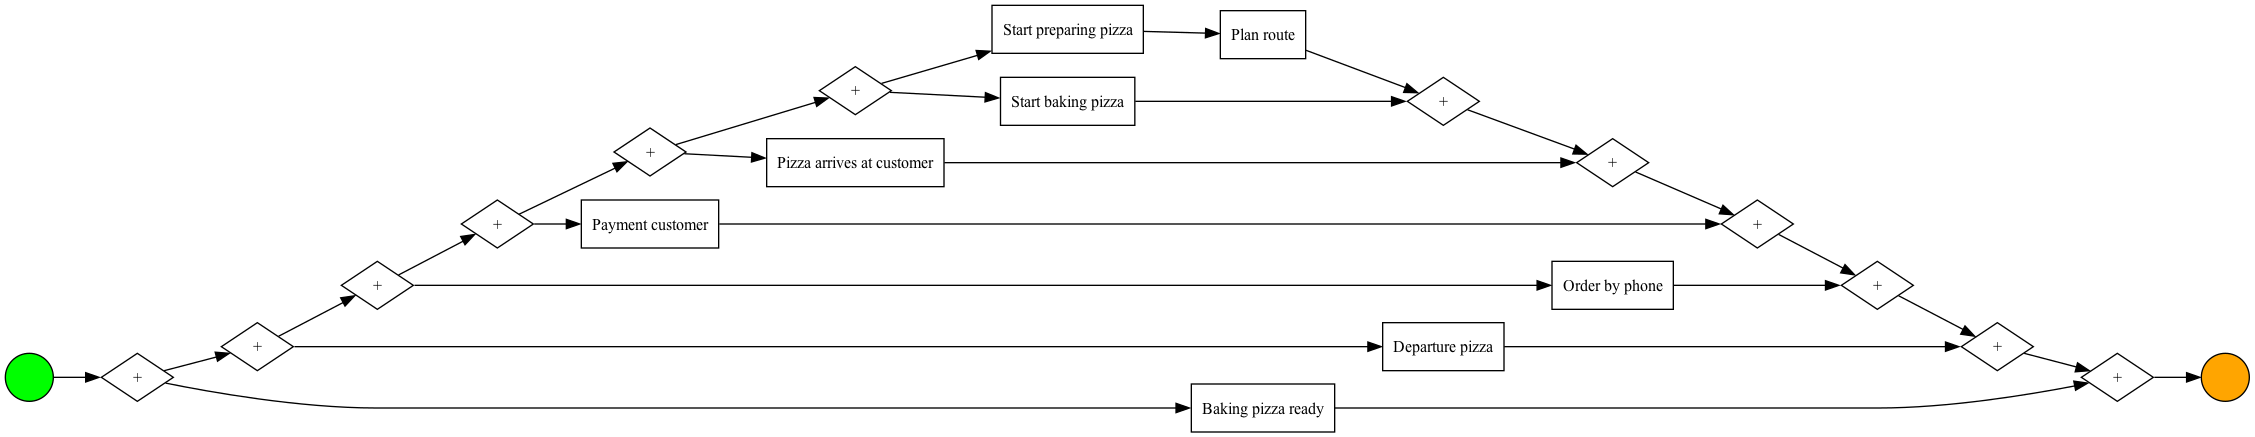


avgProfit = 7.932960893854749 € 
avgCosts = 15.273743016759777 € 
avgRevenue = 23.206703910614525 € 
avgRating = 2.474860335195531 ⭐️
 medianDirations = 41.0 minutes


select e.sorting, e.EVENTTIME, e.ACTIVITY_EN, e.Automation,  c.*, Revenue - Costs as "Profit"
                from Pizza_Event e
                inner join Pizza_Case c on e._CASE_KEY = c._CASE_KEY
                WHERE Variant = 1
                order by sorting
        




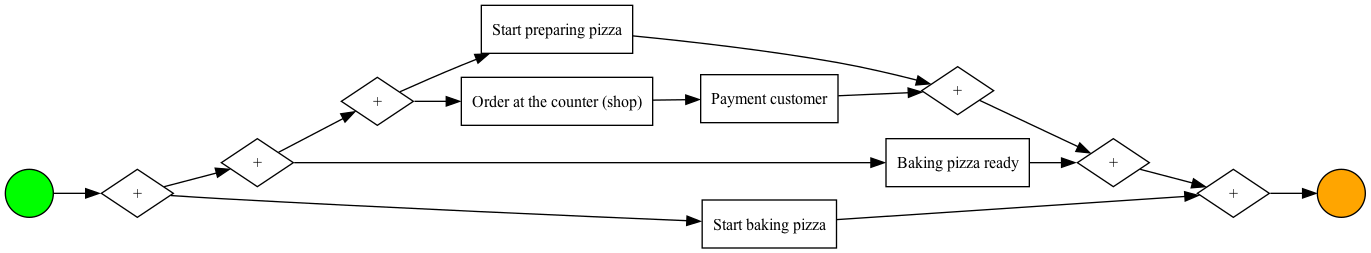


avgProfit = 6.656330749354005 € 
avgCosts = 15.31266149870801 € 
avgRevenue = 21.968992248062015 € 
avgRating = 3.7235142118863047 ⭐️
 medianDirations = 12.0 minutes


select e.sorting, e.EVENTTIME, e.ACTIVITY_EN, e.Automation,  c.*, Revenue - Costs as "Profit"
                from Pizza_Event e
                inner join Pizza_Case c on e._CASE_KEY = c._CASE_KEY
                WHERE Variant = 2
                order by sorting
        




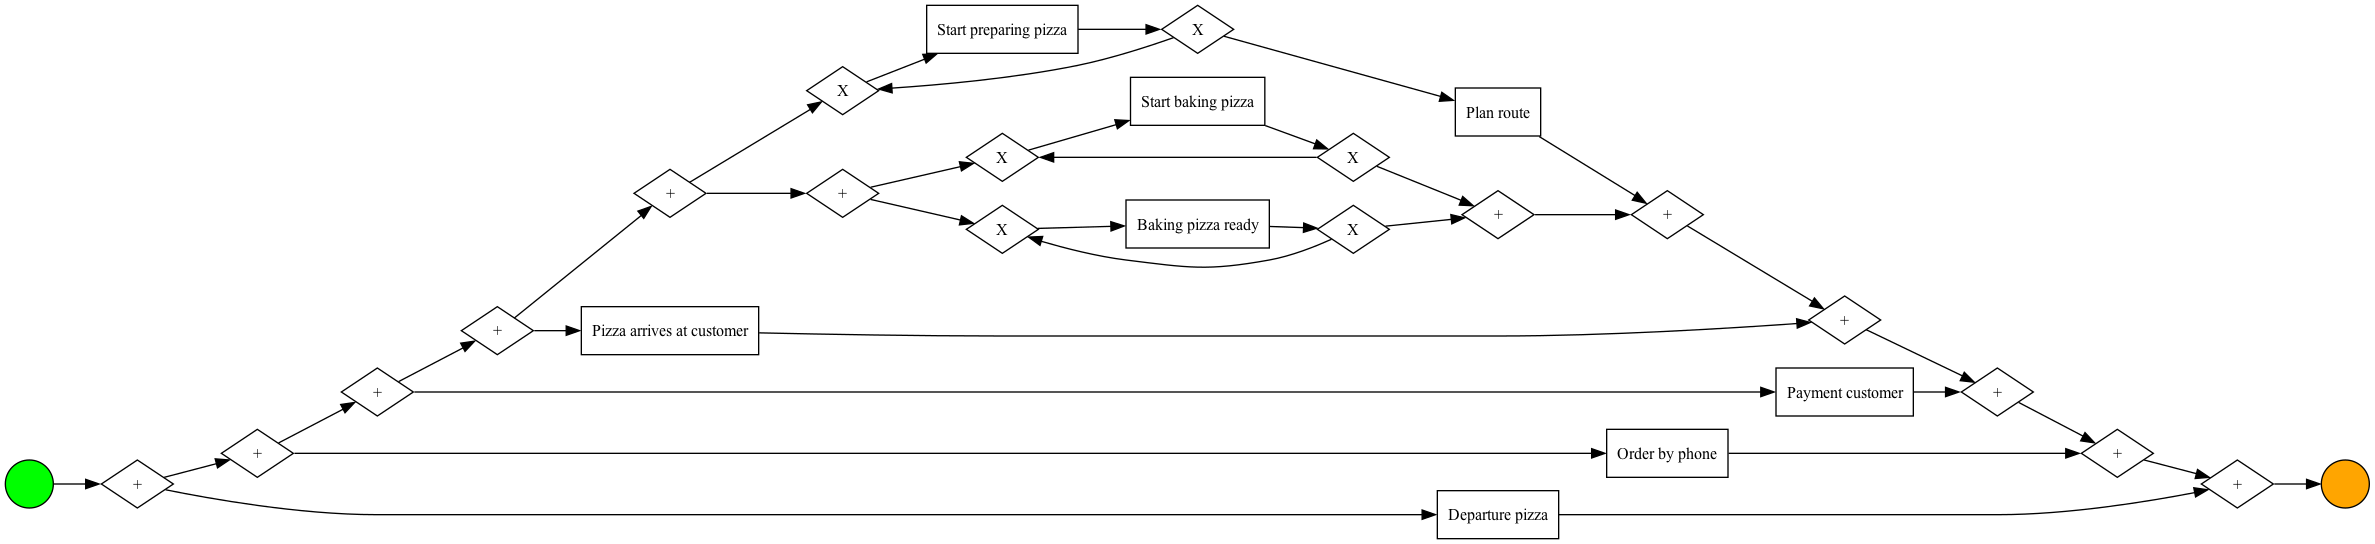


avgProfit = 7.183229813664596 € 
avgCosts = 15.251552795031056 € 
avgRevenue = 22.434782608695652 € 
avgRating = 1.2732919254658386 ⭐️
 medianDirations = 61.0 minutes


select e.sorting, e.EVENTTIME, e.ACTIVITY_EN, e.Automation,  c.*, Revenue - Costs as "Profit"
                from Pizza_Event e
                inner join Pizza_Case c on e._CASE_KEY = c._CASE_KEY
                WHERE Variant = 3
                order by sorting
        




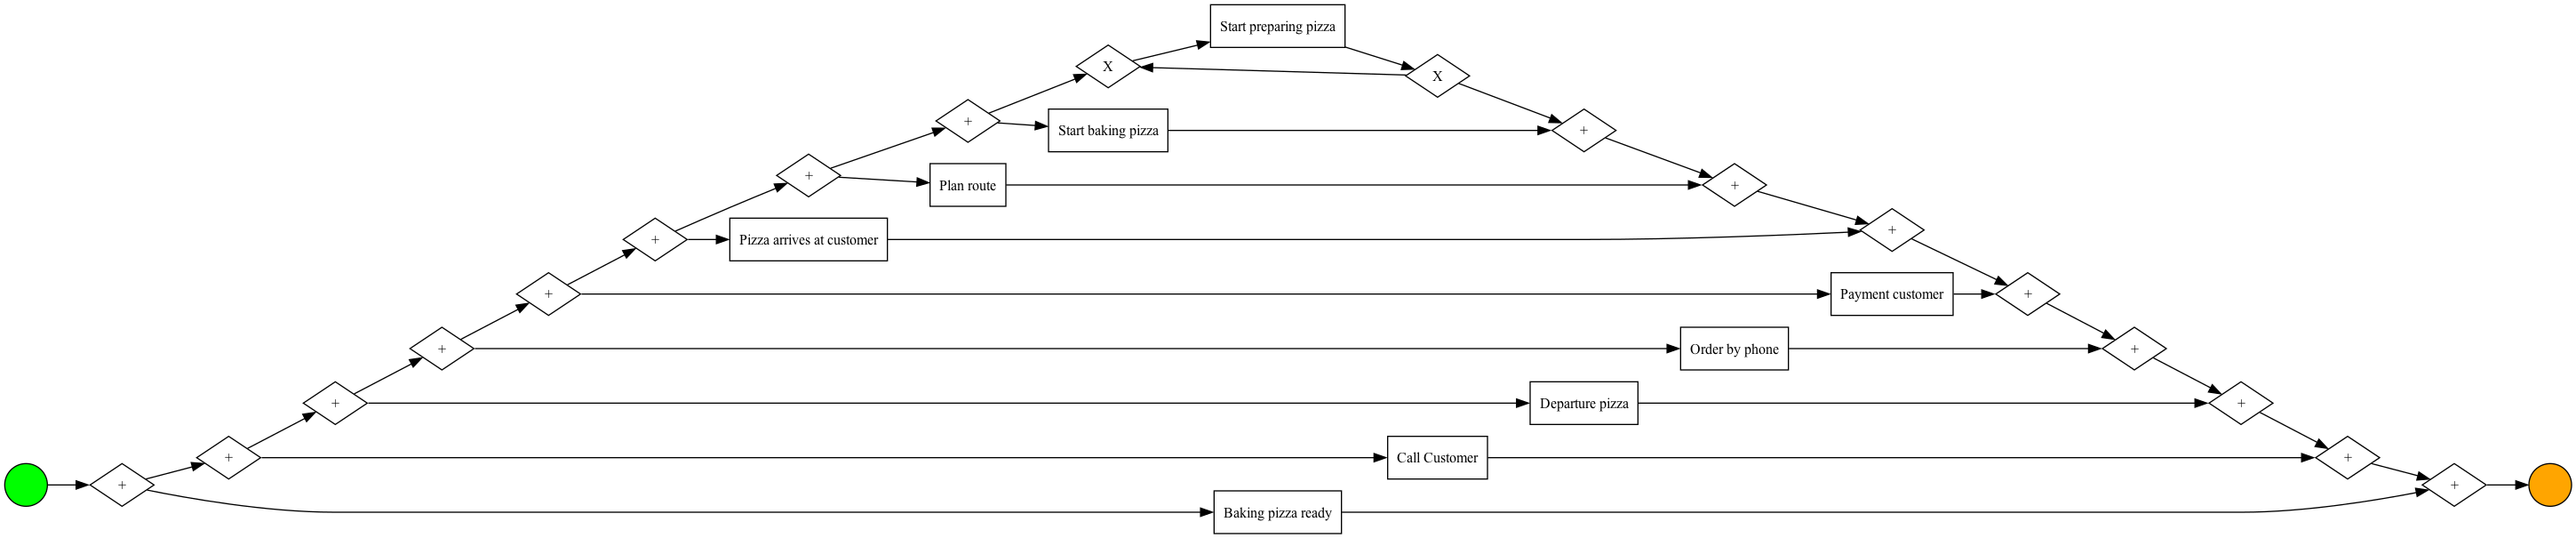


avgProfit = 8.093023255813954 € 
avgCosts = 16.8953488372093 € 
avgRevenue = 24.988372093023255 € 
avgRating = 1.0852713178294573 ⭐️
 medianDirations = 48.0 minutes


select e.sorting, e.EVENTTIME, e.ACTIVITY_EN, e.Automation,  c.*, Revenue - Costs as "Profit"
                from Pizza_Event e
                inner join Pizza_Case c on e._CASE_KEY = c._CASE_KEY
                WHERE Variant = 4
                order by sorting
        




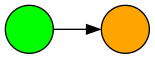


avgProfit = NaT € 
avgCosts = NaT € 
avgRevenue = NaT € 
avgRating = NaT ⭐️
 medianDirations = nan minutes


select e.sorting, e.EVENTTIME, e.ACTIVITY_EN, e.Automation,  c.*, Revenue - Costs as "Profit"
                from Pizza_Event e
                inner join Pizza_Case c on e._CASE_KEY = c._CASE_KEY
                WHERE Variant = 5
                order by sorting
        




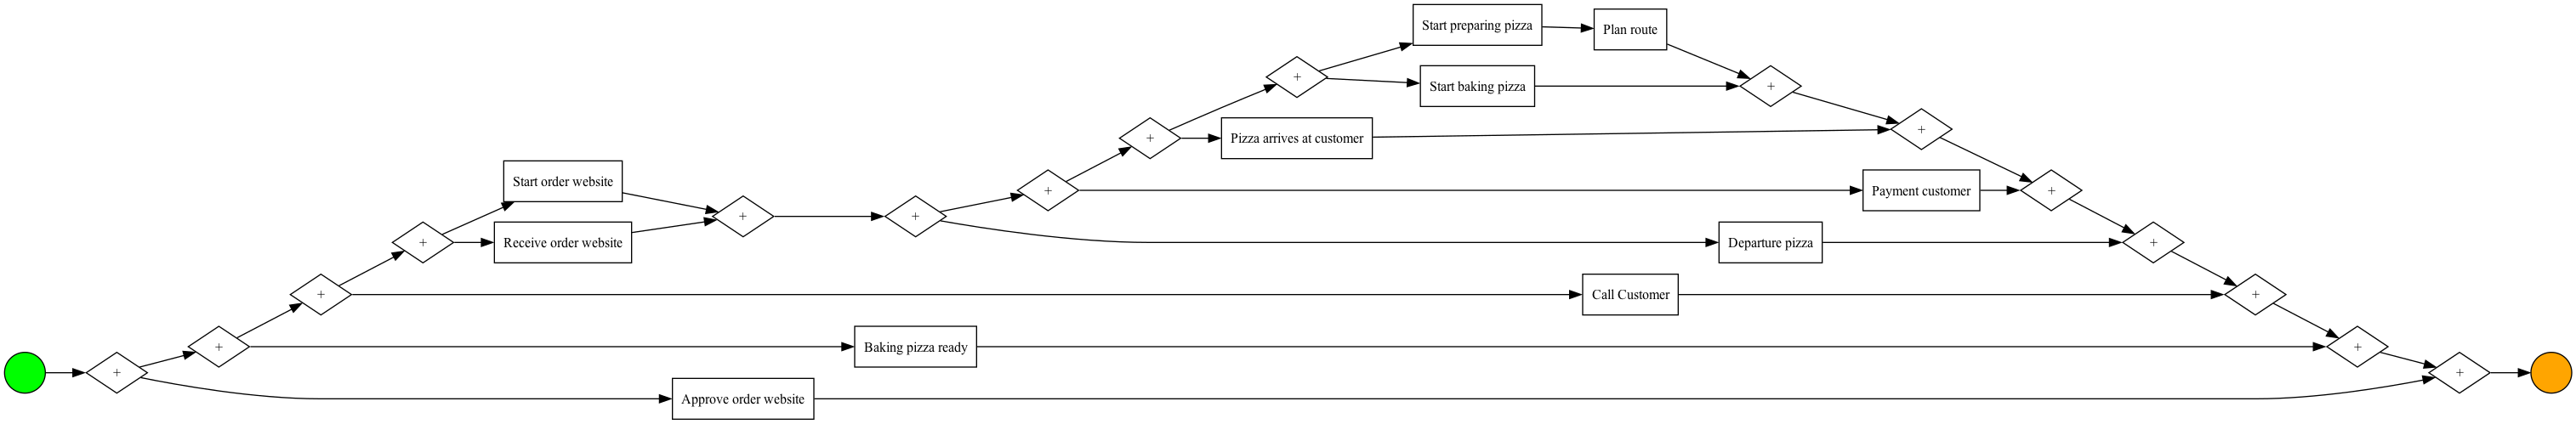


avgProfit = 9.751937984496124 € 
avgCosts = 15.015503875968992 € 
avgRevenue = 24.767441860465116 € 
avgRating = 2.395348837209302 ⭐️
 medianDirations = 56.0 minutes


select e.sorting, e.EVENTTIME, e.ACTIVITY_EN, e.Automation,  c.*, Revenue - Costs as "Profit"
                from Pizza_Event e
                inner join Pizza_Case c on e._CASE_KEY = c._CASE_KEY
                WHERE Variant = 6
                order by sorting
        




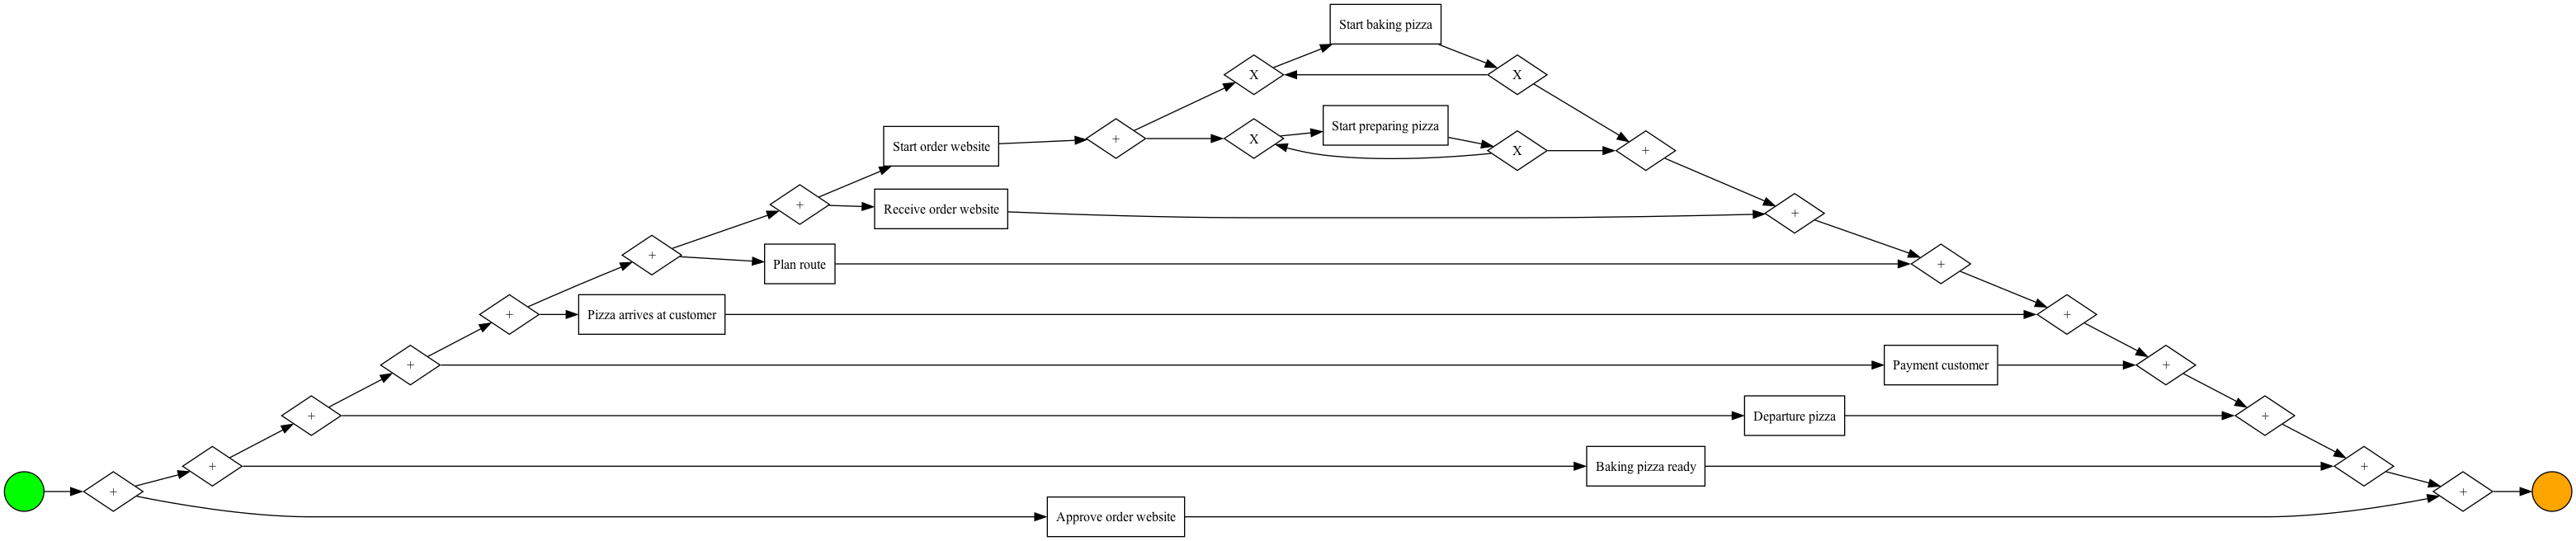


avgProfit = 10.930232558139535 € 
avgCosts = 12.430232558139535 € 
avgRevenue = 23.36046511627907 € 
avgRating = 2.302325581395349 ⭐️
 medianDirations = 60.0 minutes


select e.sorting, e.EVENTTIME, e.ACTIVITY_EN, e.Automation,  c.*, Revenue - Costs as "Profit"
                from Pizza_Event e
                inner join Pizza_Case c on e._CASE_KEY = c._CASE_KEY
                WHERE Variant = 7
                order by sorting
        




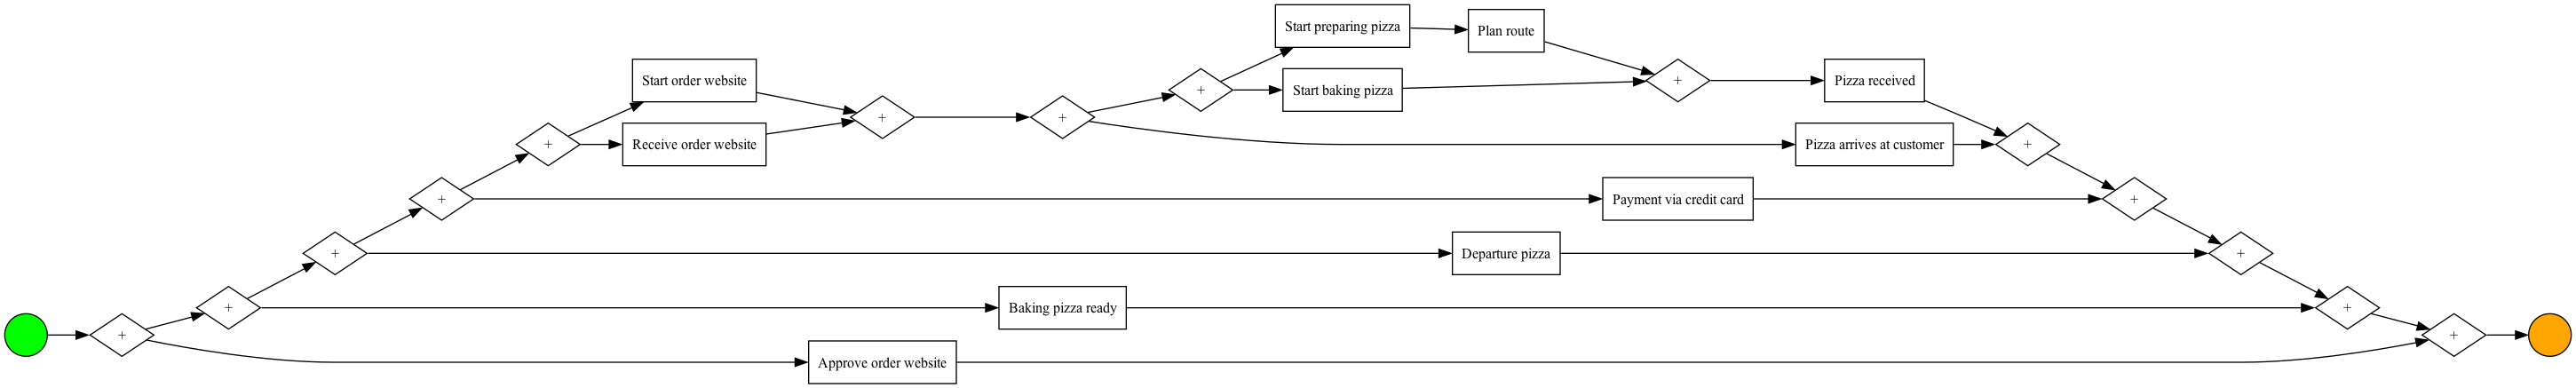


avgProfit = 6.359375 € 
avgCosts = 14.734375 € 
avgRevenue = 21.09375 € 
avgRating = 2.765625 ⭐️
 medianDirations = 57.0 minutes


select e.sorting, e.EVENTTIME, e.ACTIVITY_EN, e.Automation,  c.*, Revenue - Costs as "Profit"
                from Pizza_Event e
                inner join Pizza_Case c on e._CASE_KEY = c._CASE_KEY
                WHERE Variant = 8
                order by sorting
        




In [130]:
queries = [
        #"SELECT * FROM Pizza_Event",
]
for i in range(1, 9):
        queries.append(f"""select e.sorting, e.EVENTTIME, e.ACTIVITY_EN, e.Automation,  c.*, Revenue - Costs as "Profit"
                from Pizza_Event e
                inner join Pizza_Case c on e._CASE_KEY = c._CASE_KEY
                WHERE Variant = {i}
                order by sorting
        """)

print(queries)

for query in queries:
        query2BPMN(query)
        print(query)
        print()
        print()

In [131]:
profitByVariant = pd.read_sql_query("""SELECT Variant, AVG(Revenue - Costs) AS AvgProfit
FROM Pizza_Case
GROUP BY Variant""", con)
profitByVariant

,Variant,AvgProfit
0,1,7.932961
1,2,6.656331
2,3,7.183230
3,4,8.093023
4,5,5.029070
5,6,9.751938
6,7,10.930233
7,8,6.359375
8,9,8.558140


## Analyse by Customer Satisfaction

['select e.sorting, e.EVENTTIME, e.ACTIVITY_EN, e.Automation,  c.*, Revenue - Costs as "Profit"\n                from Pizza_Event e\n                inner join Pizza_Case c on e._CASE_KEY = c._CASE_KEY\n                WHERE CustomerSatisfaction = 1\n                order by sorting\n        ', 'select e.sorting, e.EVENTTIME, e.ACTIVITY_EN, e.Automation,  c.*, Revenue - Costs as "Profit"\n                from Pizza_Event e\n                inner join Pizza_Case c on e._CASE_KEY = c._CASE_KEY\n                WHERE CustomerSatisfaction = 2\n                order by sorting\n        ', 'select e.sorting, e.EVENTTIME, e.ACTIVITY_EN, e.Automation,  c.*, Revenue - Costs as "Profit"\n                from Pizza_Event e\n                inner join Pizza_Case c on e._CASE_KEY = c._CASE_KEY\n                WHERE CustomerSatisfaction = 3\n                order by sorting\n        ', 'select e.sorting, e.EVENTTIME, e.ACTIVITY_EN, e.Automation,  c.*, Revenue - Costs as "Profit"\n                fr

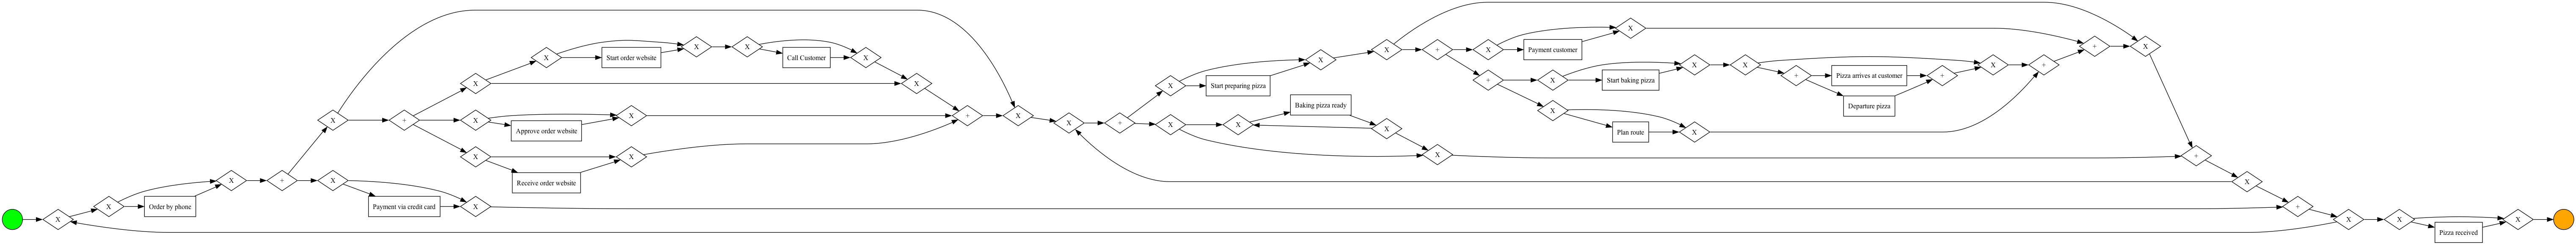


avgProfit = 8.0827182489183 € 
avgCosts = 15.497073046576737 € 
avgRevenue = 23.57979129549504 € 
avgRating = 1.0 ⭐️
 medianDirations = 50.0 minutes


select e.sorting, e.EVENTTIME, e.ACTIVITY_EN, e.Automation,  c.*, Revenue - Costs as "Profit"
                from Pizza_Event e
                inner join Pizza_Case c on e._CASE_KEY = c._CASE_KEY
                WHERE CustomerSatisfaction = 1
                order by sorting
        




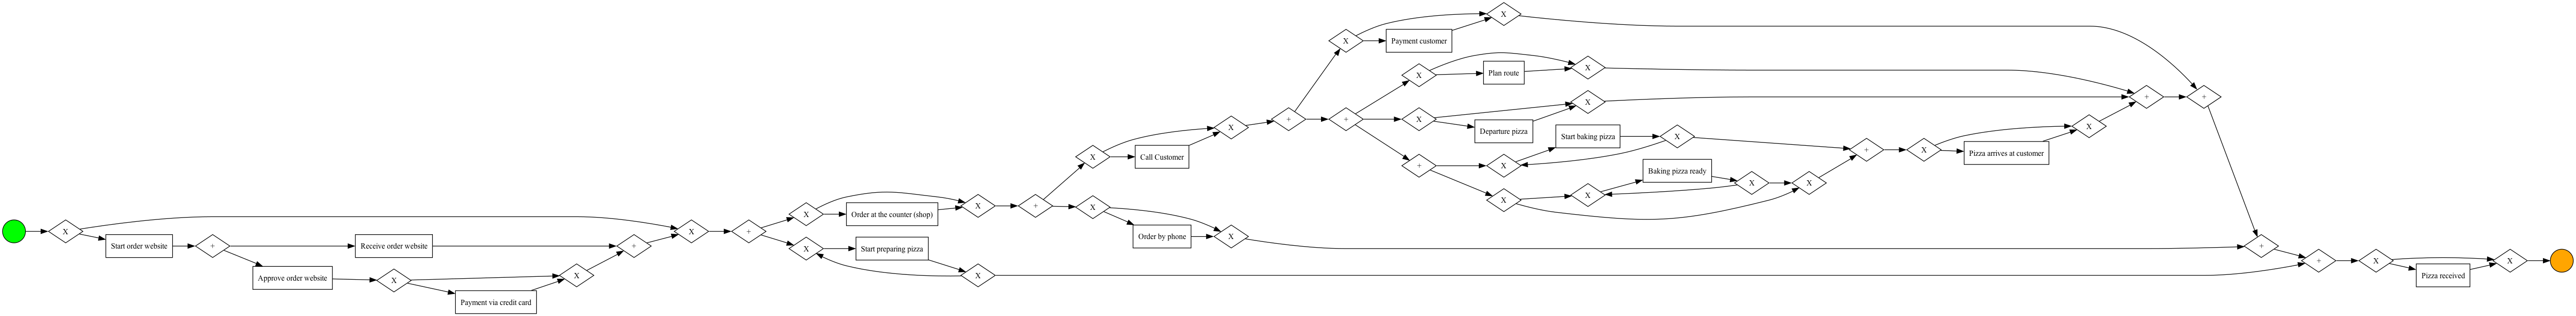


avgProfit = 8.196788990825688 € 
avgCosts = 15.06788990825688 € 
avgRevenue = 23.26467889908257 € 
avgRating = 2.0 ⭐️
 medianDirations = 47.0 minutes


select e.sorting, e.EVENTTIME, e.ACTIVITY_EN, e.Automation,  c.*, Revenue - Costs as "Profit"
                from Pizza_Event e
                inner join Pizza_Case c on e._CASE_KEY = c._CASE_KEY
                WHERE CustomerSatisfaction = 2
                order by sorting
        




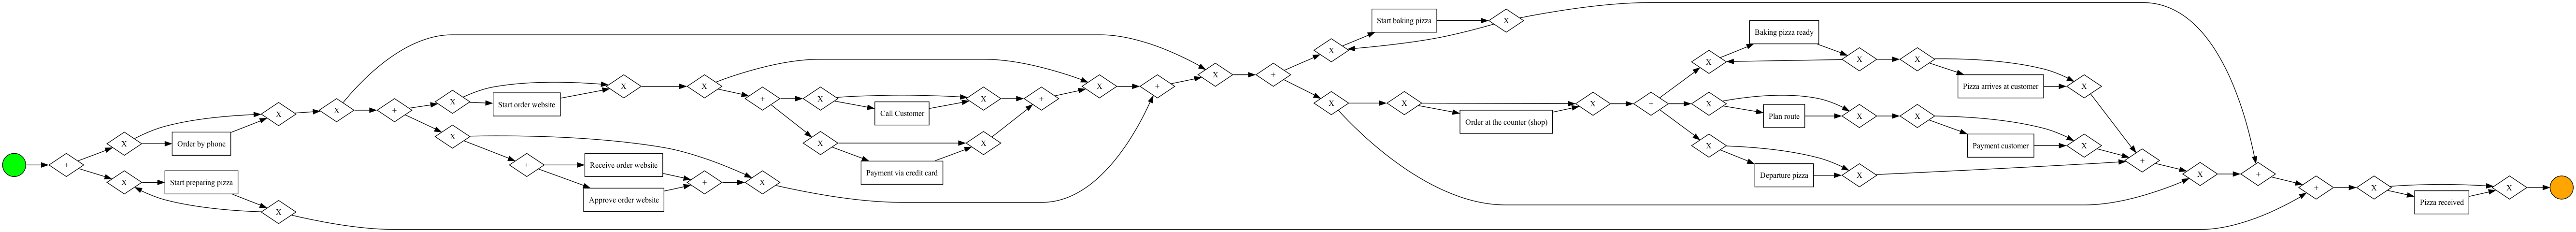


avgProfit = 7.288947677836567 € 
avgCosts = 14.920928865373309 € 
avgRevenue = 22.209876543209877 € 
avgRating = 3.0 ⭐️
 medianDirations = 35.0 minutes


select e.sorting, e.EVENTTIME, e.ACTIVITY_EN, e.Automation,  c.*, Revenue - Costs as "Profit"
                from Pizza_Event e
                inner join Pizza_Case c on e._CASE_KEY = c._CASE_KEY
                WHERE CustomerSatisfaction = 3
                order by sorting
        




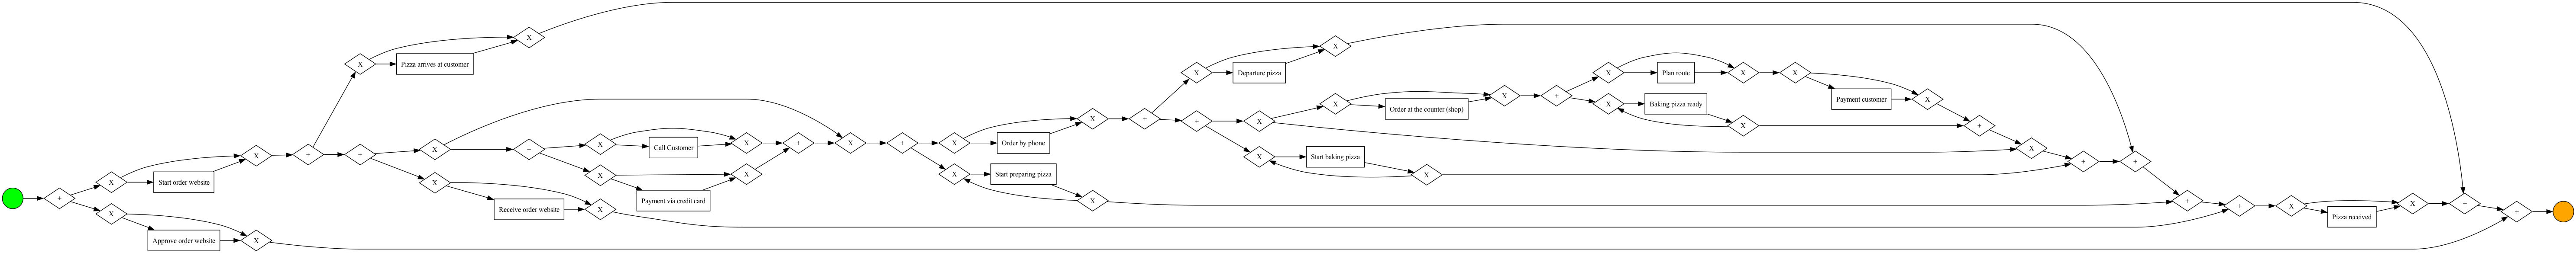


avgProfit = 7.183257918552036 € 
avgCosts = 15.816176470588236 € 
avgRevenue = 22.999434389140273 € 
avgRating = 4.0 ⭐️
 medianDirations = 16.0 minutes


select e.sorting, e.EVENTTIME, e.ACTIVITY_EN, e.Automation,  c.*, Revenue - Costs as "Profit"
                from Pizza_Event e
                inner join Pizza_Case c on e._CASE_KEY = c._CASE_KEY
                WHERE CustomerSatisfaction = 4
                order by sorting
        




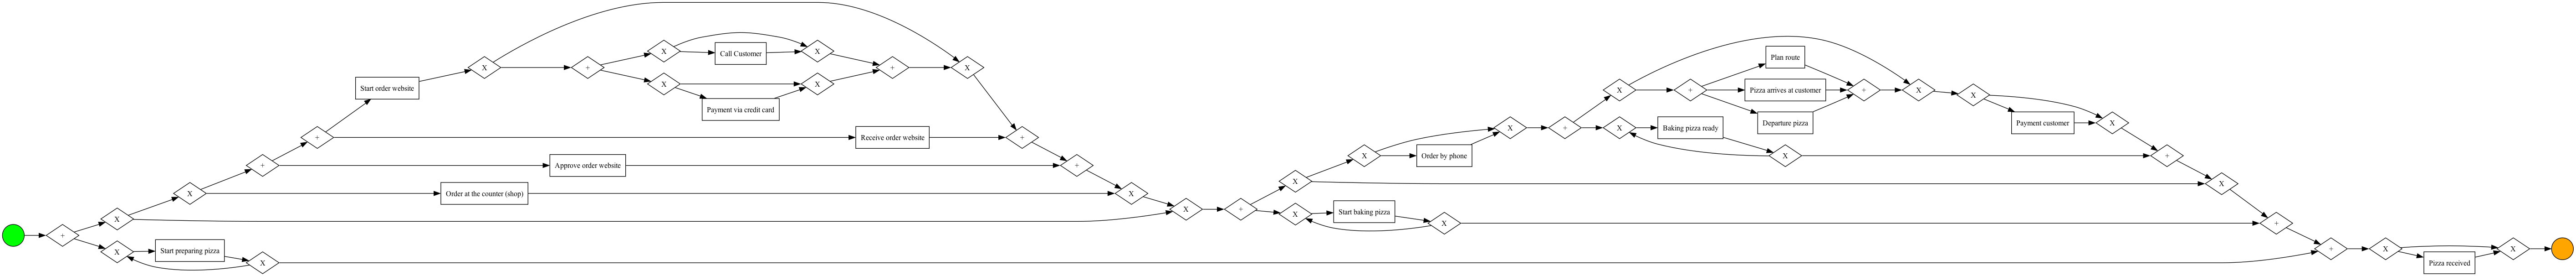


avgProfit = 9.03257529194837 € 
avgCosts = 14.558696988322065 € 
avgRevenue = 23.591272280270438 € 
avgRating = 5.0 ⭐️
 medianDirations = 33.0 minutes


select e.sorting, e.EVENTTIME, e.ACTIVITY_EN, e.Automation,  c.*, Revenue - Costs as "Profit"
                from Pizza_Event e
                inner join Pizza_Case c on e._CASE_KEY = c._CASE_KEY
                WHERE CustomerSatisfaction = 5
                order by sorting
        




In [133]:
queries = []
for i in range(1,6):
        queries.append(f"""select e.sorting, e.EVENTTIME, e.ACTIVITY_EN, e.Automation,  c.*, Revenue - Costs as "Profit"
                from Pizza_Event e
                inner join Pizza_Case c on e._CASE_KEY = c._CASE_KEY
                WHERE CustomerSatisfaction = {i}
                order by sorting
        """)

print(queries)

for query in queries:
        query2BPMN(query)
        print(query)
        print()
        print()

## Analyse by Customer IsSatisfied

['select e.sorting, e.EVENTTIME, e.ACTIVITY_EN, e.Automation,  c.*, Revenue - Costs as "Profit"\n                from Pizza_Event e\n                inner join Pizza_Case c on e._CASE_KEY = c._CASE_KEY\n                WHERE CustomerSatisfaction >= 3\n                order by sorting\n        ', 'select e.sorting, e.EVENTTIME, e.ACTIVITY_EN, e.Automation,  c.*, Revenue - Costs as "Profit"\n                from Pizza_Event e\n                inner join Pizza_Case c on e._CASE_KEY = c._CASE_KEY\n                WHERE CustomerSatisfaction <= 3\n                order by sorting\n        ']


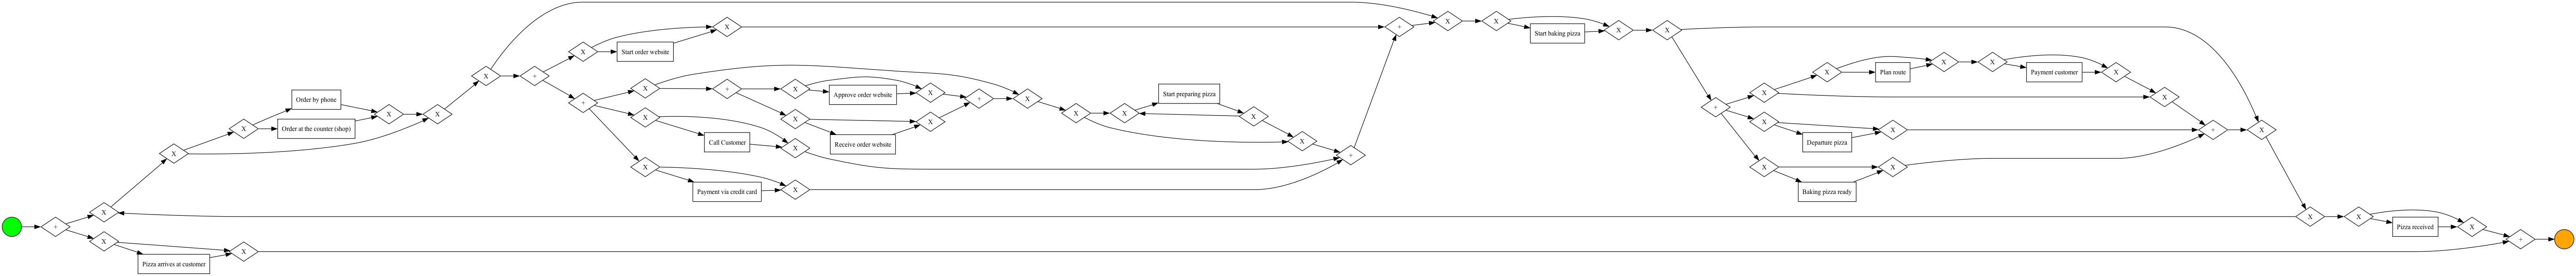


avgProfit = 7.6788288951007795 € 
avgCosts = 15.067088421362365 € 
avgRevenue = 22.745917316463146 € 
avgRating = 3.7388553773723703 ⭐️
 medianDirations = 28.0 minutes


select e.sorting, e.EVENTTIME, e.ACTIVITY_EN, e.Automation,  c.*, Revenue - Costs as "Profit"
                from Pizza_Event e
                inner join Pizza_Case c on e._CASE_KEY = c._CASE_KEY
                WHERE CustomerSatisfaction >= 3
                order by sorting
        




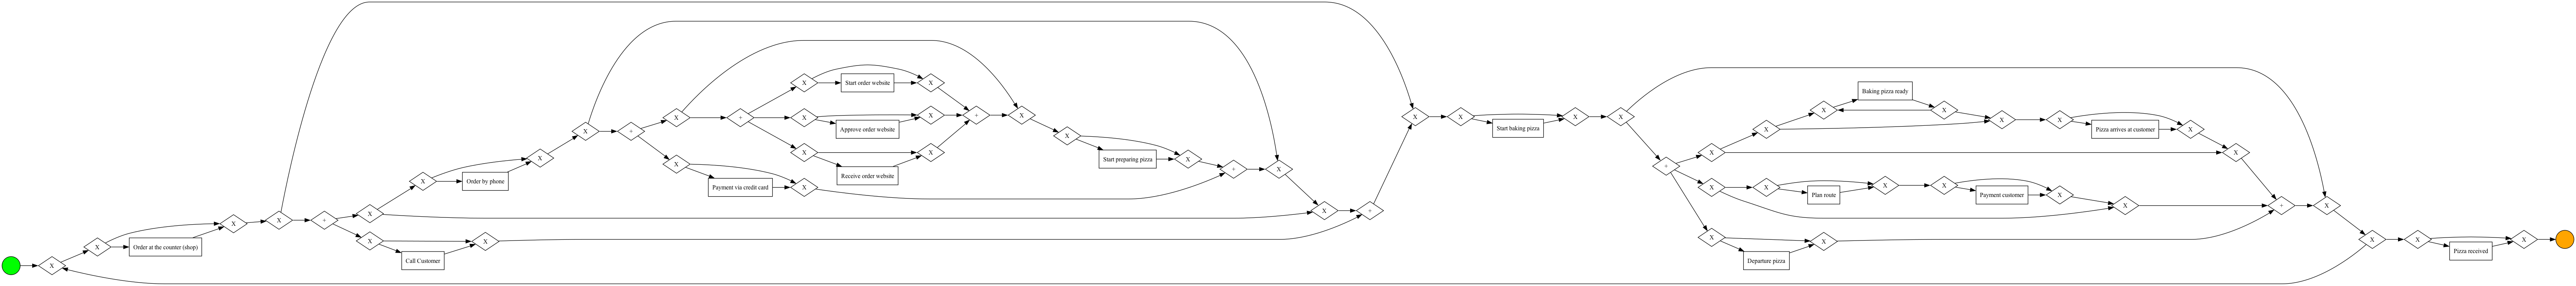


avgProfit = 7.898985016916384 € 
avgCosts = 15.257854035766071 € 
avgRevenue = 23.156839052682454 € 
avgRating = 1.4898501691638473 ⭐️
 medianDirations = 47.0 minutes


select e.sorting, e.EVENTTIME, e.ACTIVITY_EN, e.Automation,  c.*, Revenue - Costs as "Profit"
                from Pizza_Event e
                inner join Pizza_Case c on e._CASE_KEY = c._CASE_KEY
                WHERE CustomerSatisfaction <= 3
                order by sorting
        




In [136]:
queries = [f"""select e.sorting, e.EVENTTIME, e.ACTIVITY_EN, e.Automation,  c.*, Revenue - Costs as "Profit"
                from Pizza_Event e
                inner join Pizza_Case c on e._CASE_KEY = c._CASE_KEY
                WHERE CustomerSatisfaction >= 3
                order by sorting
        """, f"""select e.sorting, e.EVENTTIME, e.ACTIVITY_EN, e.Automation,  c.*, Revenue - Costs as "Profit"
                from Pizza_Event e
                inner join Pizza_Case c on e._CASE_KEY = c._CASE_KEY
                WHERE CustomerSatisfaction <= 3
                order by sorting
        """]

print(queries)

for query in queries:
        query2BPMN(query)
        print(query)
        print()
        print()

## Analyse by Profit

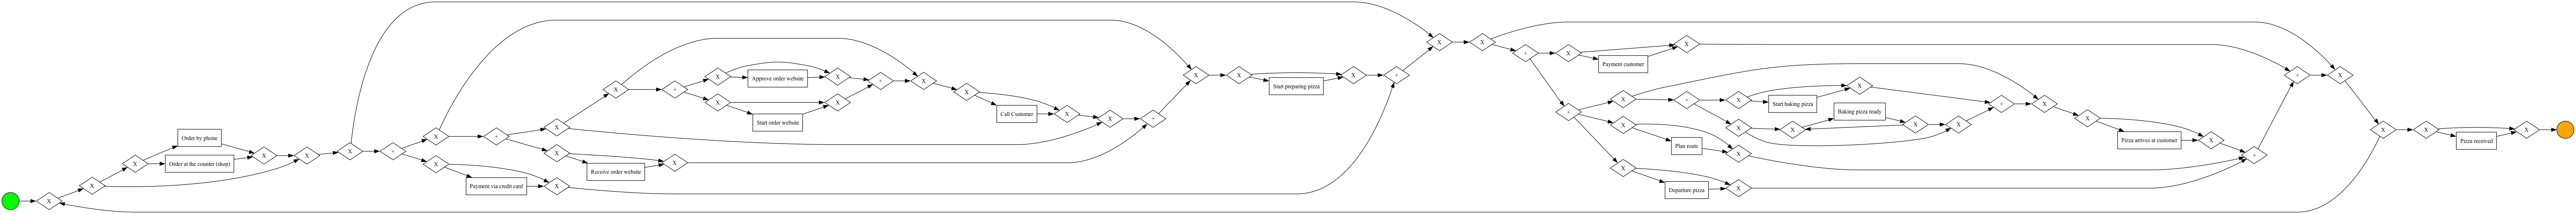


avgProfit = 19.102536997885835 € 
avgCosts = 8.920046127234288 € 
avgRevenue = 28.02258312512012 € 
avgRating = 2.119450317124736 ⭐️
 medianDirations = 43.0 minutes


select e.sorting, e.EVENTTIME, e.ACTIVITY_EN, e.Automation,  c.*, Revenue - Costs as "Profit"
from Pizza_Event e
inner join Pizza_Case c on e._CASE_KEY = c._CASE_KEY
WHERE Profit > 0
order by sorting





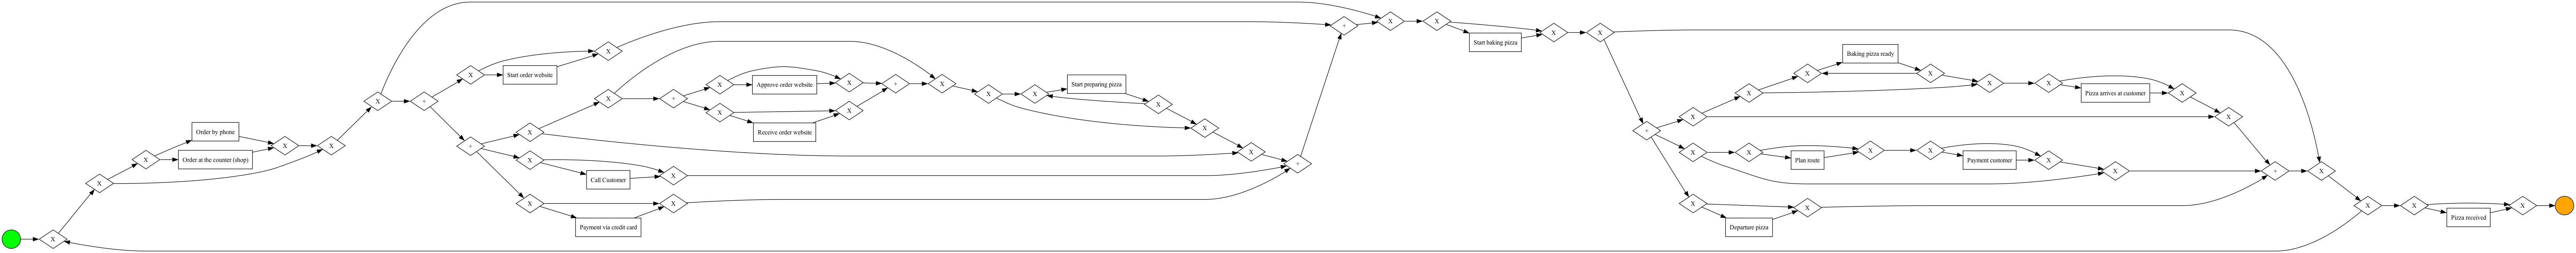


avgProfit = -14.937258097372174 € 
avgCosts = 28.940313709513138 € 
avgRevenue = 14.003055612140965 € 
avgRating = 2.157262171521695 ⭐️
 medianDirations = 42.0 minutes


select e.sorting, e.EVENTTIME, e.ACTIVITY_EN, e.Automation,  c.*, Revenue - Costs as "Profit"
from Pizza_Event e
inner join Pizza_Case c on e._CASE_KEY = c._CASE_KEY
WHERE Profit < 0
order by sorting





In [135]:
queries = ["""select e.sorting, e.EVENTTIME, e.ACTIVITY_EN, e.Automation,  c.*, Revenue - Costs as "Profit"
from Pizza_Event e
inner join Pizza_Case c on e._CASE_KEY = c._CASE_KEY
WHERE Profit > 0
order by sorting
""",
"""select e.sorting, e.EVENTTIME, e.ACTIVITY_EN, e.Automation,  c.*, Revenue - Costs as "Profit"
from Pizza_Event e
inner join Pizza_Case c on e._CASE_KEY = c._CASE_KEY
WHERE Profit < 0
order by sorting
"""]

for query in queries:
        query2BPMN(query)
        print(query)
        print()
        print()